**Dataset ktb Classification**

**Librerias**

In [1]:
import numpy as np
import os
import cv2
import re
import seaborn as sns
#from math import ceil
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

In [2]:
#import keras
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, concatenate, AveragePooling2D, GlobalAveragePooling2D
from keras import optimizers, backend
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, CSVLogger, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image as image_utils # Trabajar Imgs
from keras.utils import np_utils #Trabajr imgs de tipo objeto a trabajar con ellas
#from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU 
from keras import backend as K
#from tensorflow.keras.datasets import cifar10   # Función para descargar las imágenes de Cifar 10
import tensorflow as tf

Using TensorFlow backend.
/home/aarriaga/.virtualenvs/cv4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/aarriaga/.virtualenvs/cv4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/aarriaga/.virtualenvs/cv4/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/aarriaga/.virtualenvs/c

**Descargar imagenes  KTH-TIPS Dataset (KTB)**

https://www.nada.kth.se/cvap/databases/kth-tips/

In [3]:
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

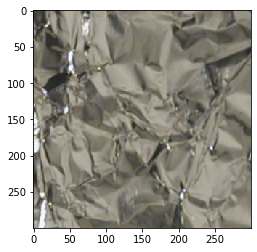

In [4]:
# Visualización de datos a trabajar.
# Es importante tener clara la ubicación de las imágenes
# La siguiente dirección considera que en tu Unidad de drive se encuentra una carpeta
# llamada PerrosGatos con las imágenes.
imagen = image_utils.load_img('/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/aluminium_foil/aluminium_0.png')#, 
                             #target_size = (256,256))
plt.imshow(imagen, cmap='Accent')
plt.show()

**Construir Dataset**

In [5]:
n_imagenes = 432
alto = 300
ancho = 300
canales = 3
data0 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data1 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data2 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data3 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data4 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data5 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data6 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data7 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data8 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data9 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
data10 = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)

labels0 = np.array([0]*n_imagenes)
labels1 = np.array([1]*n_imagenes)
labels2 = np.array([2]*n_imagenes)
labels3 = np.array([3]*n_imagenes)
labels4 = np.array([4]*n_imagenes)
labels5 = np.array([5]*n_imagenes)
labels6 = np.array([6]*n_imagenes)
labels7 = np.array([7]*n_imagenes)
labels8 = np.array([8]*n_imagenes)
labels9 = np.array([9]*n_imagenes)
labels10 = np.array([10]*n_imagenes)

**Lectura de imagenes**

In [6]:
print("[INFO] Reading images...")
for i in range (n_imagenes):                                  # recuerda que la cuenta es de 0 a 399
  #a0 = '/content/dtd47class/bandeda/imga_'+str(i)+'.png'      # construimos el nombre de la imagen
  a0 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/aluminium_foil/aluminium_'+str(i)+'.png' # construimos el nombre de la imagen
  a1 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/brown_bread/brownbread_'+str(i)+'.png'      # construimos el nombre de la imagen
  a2 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/corduroy/corduroy_'+str(i)+'.png'      # construimos el nombre de la imagen
  a3 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/cork/cork_'+str(i)+'.png'      # construimos el nombre de la imagen
  a4 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/cotton/cotton_'+str(i)+'.png'     # construimos el nombre de la imagen
  a5 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/cracker/cracker_'+str(i)+'.png'#struimos el nombre de la imagen
  a6 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/lettuce_leaf/lettuce_'+str(i)+'.png'      # construimos el nombre de la imagen
  a7 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/linen/linen_'+str(i)+'.png'     # construimos el nombre de la imagen
  a8 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/white_bread/whitebread_'+str(i)+'.png'      # construimos el nombre de la imagen
  a9 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/wood/wood_'+str(i)+'.png'    # construimos el nombre de la imagen
  a10 = '/home/aarriaga/Desktop/JM AP(viernes)/ktb1/ktb1/wool/wool_'+str(i)+'.png'      # construimos el nombre de la imagen
  
  img0 = image_utils.load_img(a0, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img1 = image_utils.load_img(a1, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img2 = image_utils.load_img(a2, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img3 = image_utils.load_img(a3, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img4 = image_utils.load_img(a4, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img5 = image_utils.load_img(a5, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img6 = image_utils.load_img(a6, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img7 = image_utils.load_img(a7, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img8 = image_utils.load_img(a8, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img9 = image_utils.load_img(a9, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  img10 = image_utils.load_img(a10, target_size = (alto,ancho)) # con el nombre, leemos la imagen
  
  img0 = image_utils.img_to_array(img0)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img1 = image_utils.img_to_array(img1)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img2 = image_utils.img_to_array(img2)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img3 = image_utils.img_to_array(img3)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img4 = image_utils.img_to_array(img4)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img5 = image_utils.img_to_array(img5)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img6 = image_utils.img_to_array(img6)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img7 = image_utils.img_to_array(img7)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img8 = image_utils.img_to_array(img8)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img9 = image_utils.img_to_array(img9)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  img10 = image_utils.img_to_array(img10)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  # Preprocesamiento
  # Aquí normalizamos la imagen antes de almacenarla en el dataset
  img0 /= 255
  img1 /= 255
  img2 /= 255
  img3 /= 255
  img4 /= 255
  img5 /= 255
  img6 /= 255
  img7 /= 255
  img8 /= 255
  img9 /= 255
  img10 /= 255
  data0[i] = img0                                            # Ingresamos la imagen en el lugar i del dataset
  data1[i] = img1                                            # Ingresamos la imagen en el lugar i del dataset
  data2[i] = img2                                            # Ingresamos la imagen en el lugar i del dataset
  data3[i] = img3                                            # Ingresamos la imagen en el lugar i del dataset
  data4[i] = img4                                            # Ingresamos la imagen en el lugar i del dataset
  data5[i] = img5                                            # Ingresamos la imagen en el lugar i del dataset
  data6[i] = img6                                           # Ingresamos la imagen en el lugar i del dataset
  data7[i] = img7                                            # Ingresamos la imagen en el lugar i del dataset
  data8[i] = img8                                            # Ingresamos la imagen en el lugar i del dataset
  data9[i] = img9                                            # Ingresamos la imagen en el lugar i del dataset
  data10[i] = img10                                            # Ingresamos la imagen en el lugar i del dataset
print("[INFO] ok...")

[INFO] Reading images...
[INFO] ok...


In [7]:
print("[INFO] 10 First DataSet-Shape...")
print("Data aluminium foil:",data0.shape)
print("Data brown bread:",data1.shape)
print("Data corduroy:",data2.shape)
print("Data cork:",data3.shape)
print("Data cotton:",data4.shape)
print("Data cracker:",data5.shape)
print("Data lettuce leaf:",data6.shape)
print("Data linen:",data7.shape)
print("Data white bread:",data8.shape)
print("Data wood:",data9.shape)
print("Data wool:",data10.shape)

[INFO] 10 First DataSet-Shape...
Data aluminium foil: (432, 300, 300, 3)
Data brown bread: (432, 300, 300, 3)
Data corduroy: (432, 300, 300, 3)
Data cork: (432, 300, 300, 3)
Data cotton: (432, 300, 300, 3)
Data cracker: (432, 300, 300, 3)
Data lettuce leaf: (432, 300, 300, 3)
Data linen: (432, 300, 300, 3)
Data white bread: (432, 300, 300, 3)
Data wood: (432, 300, 300, 3)
Data wool: (432, 300, 300, 3)


In [8]:
data0[0]

array([[[0.3529412 , 0.35686275, 0.3372549 ],
        [0.34901962, 0.3529412 , 0.33333334],
        [0.3137255 , 0.31764707, 0.29803923],
        ...,
        [0.37254903, 0.37254903, 0.34117648],
        [0.37254903, 0.3647059 , 0.3372549 ],
        [0.38431373, 0.3647059 , 0.34117648]],

       [[0.3372549 , 0.33333334, 0.3019608 ],
        [0.32941177, 0.32941177, 0.3019608 ],
        [0.29803923, 0.3019608 , 0.27450982],
        ...,
        [0.41568628, 0.40784314, 0.3882353 ],
        [0.39215687, 0.38039216, 0.3529412 ],
        [0.38039216, 0.36862746, 0.32941177]],

       [[0.31764707, 0.30980393, 0.26666668],
        [0.30588236, 0.3019608 , 0.27058825],
        [0.28235295, 0.28235295, 0.25882354],
        ...,
        [0.47843137, 0.46666667, 0.44705883],
        [0.43529412, 0.42352942, 0.39215687],
        [0.4       , 0.39215687, 0.34117648]],

       ...,

       [[0.46666667, 0.4392157 , 0.36862746],
        [0.5254902 , 0.5058824 , 0.4509804 ],
        [0.59607846, 0

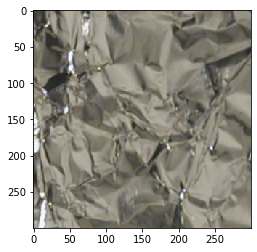

In [9]:
#imagen2 = image_utils.load_img(dataauto[0], 
                             #target_size = (16,16))
plt.imshow(data0[0], cmap='Accent')
plt.show()

**Dividimos los datos en entrenameinto y prueba para cada una de las clases**

In [10]:
#Dividimos los datos en entrenameinto y prueba para cada una de las clases
print("[INFO] Split the data per clase...")
train_0, test_0, l0_train, l0_test = train_test_split(data0, labels0, test_size=.15)
train_1, test_1, l1_train, l1_test = train_test_split(data1, labels1, test_size=.15)
train_2, test_2, l2_train, l2_test = train_test_split(data2, labels2, test_size=.15)
train_3, test_3, l3_train, l3_test = train_test_split(data3, labels3, test_size=.15)
train_4, test_4, l4_train, l4_test = train_test_split(data4, labels4, test_size=.15)
train_5, test_5, l5_train, l5_test = train_test_split(data5, labels5, test_size=.15)
train_6, test_6, l6_train, l6_test = train_test_split(data6, labels6, test_size=.15)
train_7, test_7, l7_train, l7_test = train_test_split(data7, labels7, test_size=.15)
train_8, test_8, l8_train, l8_test = train_test_split(data8, labels8, test_size=.15)
train_9, test_9, l9_train, l9_test = train_test_split(data9, labels9, test_size=.15)
train_10, test_10, l10_train, l10_test = train_test_split(data10, labels10, test_size=.15)

print("For example: aluminium foil clase.")
print('Training data shape (aluminium foil) : ', train_0.shape, l0_train.shape)
print('Test data shape (aluminium foil): ', test_0.shape, l0_test.shape)
print("For example: wool clase.")
print('Training data shape (wool) : ', train_10.shape, l10_train.shape)
print('Test data shape (wool): ', test_10.shape, l10_test.shape)

[INFO] Split the data per clase...
For example: aluminium foil clase.
Training data shape (aluminium foil) :  (367, 300, 300, 3) (367,)
Test data shape (aluminium foil):  (65, 300, 300, 3) (65,)
For example: wool clase.
Training data shape (wool) :  (367, 300, 300, 3) (367,)
Test data shape (wool):  (65, 300, 300, 3) (65,)


**Con estas instrucciones concatenamos los datos de entrenamiento y prueba con cada clase**

In [11]:
#Con estas instrucciones concatenamos los datos de entrenamiento y prueba con cada clase
print("[INFO] Dataset creation... ")
dataset_train = np.concatenate((train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,train_10), axis=0)
labels_train = np.concatenate((l0_train,l1_train,l2_train,l3_train,l4_train,l5_train,l6_train,l7_train,l8_train,l9_train,l10_train), axis=0)

[INFO] Dataset creation... 


In [12]:
dataset_test = np.concatenate((test_0,test_1,test_2,test_3,test_4,test_5,test_6,test_7,test_8,test_9,test_10), axis=0)
labels_test = np.concatenate((l0_test,l1_test,l2_test,l3_test,l4_test,l5_test,l6_test,l7_test,l8_test,l9_test,l10_test), axis=0)
print('Training dataset shape : ', dataset_train.shape, labels_train.shape)
print('Test dataset shape : ', dataset_test.shape, labels_test.shape)

Training dataset shape :  (4037, 300, 300, 3) (4037,)
Test dataset shape :  (715, 300, 300, 3) (715,)


**Acomodamos los elementos de manera aleatoria**

In [13]:
#Acomodamos los elementos de manera aleatoria
Dataset_train, Labels_train = shuffle(dataset_train, labels_train, random_state=0)
test_x, test_y = shuffle(dataset_test, labels_test, random_state=0)

In [14]:
# Imprimimos el tamaño de los conjuntos de entrenamiento y prueba
print('El numero de imágenes en el conjunto x_train es:', Dataset_train.shape[0])
print('El numero de etiquetas en el conjunto y_train es:', Labels_train.shape[0])
print('El numero de imágenes en el conjunto x_test es:', test_x.shape[0])
print('El numero de etiquetas en el conjunto y_test es:', test_y.shape[0])

El numero de imágenes en el conjunto x_train es: 4037
El numero de etiquetas en el conjunto y_train es: 4037
El numero de imágenes en el conjunto x_test es: 715
El numero de etiquetas en el conjunto y_test es: 715


In [15]:
test_x.shape

(715, 300, 300, 3)

**Cantidad de clases**

In [16]:
classes = np.unique(test_y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  11
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10]


**Distribution of data**

/home/aarriaga/.virtualenvs/cv4/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/aarriaga/.virtualenvs/cv4/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Classes')

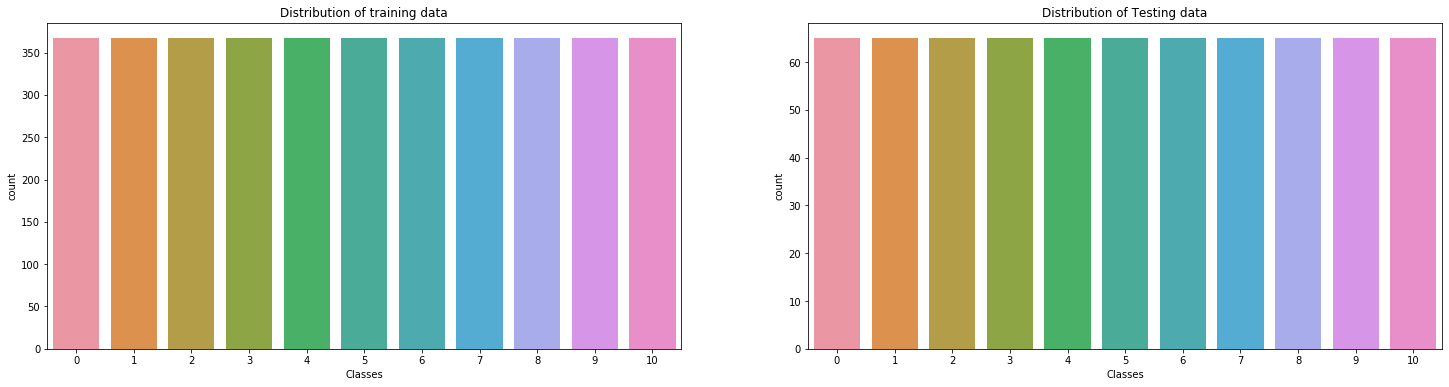

In [17]:
fig, axs = plt.subplots(1,2,figsize=(25,6)) 
# Count plot for training set
sns.countplot(Labels_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(test_y.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
#plt.show()
#plt.savefig('vgg16_img0.pdf')

**Plot de imagenes**

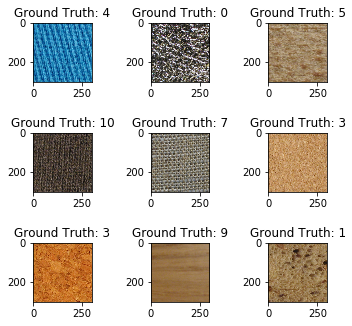

In [18]:
for i in range(9):
    plt.figure(0, figsize=[5,5])
    plt.subplot(3,3,i+1)
    plt.imshow(Dataset_train[i], cmap= 'Accent')
    plt.title("Ground Truth: {}".format(Labels_train[i]))
    plt.tight_layout()
    #plt.show()
    plt.savefig('vgg16_img1.pdf')

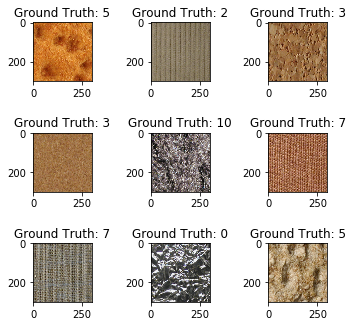

In [19]:
for i in range(9):
    plt.figure(0, figsize=[5,5])
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[i], cmap= 'Accent')
    plt.title("Ground Truth: {}".format(test_y[i]))
    plt.tight_layout()
    #plt.show()
    #plt.savefig('vgg16_img11.pdf')

**Metodología 2DWT**

In [20]:
import pywt
import pywt.data
import cv2
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [21]:
n_imagenes = 715
n_imagenes1 = 3310
n_imagenes2 = 727
alto = 150
ancho = 150
alto1 = 75
ancho1 = 75
canales = 3
testA_x = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)
trainA_x = np.zeros((n_imagenes1, ancho, alto, canales), dtype = np.float32)
validA_x = np.zeros((n_imagenes2, ancho, alto, canales), dtype = np.float32)
testA1_x = np.zeros((n_imagenes, ancho1, alto1, canales), dtype = np.float32)
trainA1_x = np.zeros((n_imagenes1, ancho1, alto1, canales), dtype = np.float32)
validA1_x = np.zeros((n_imagenes2, ancho1, alto1, canales), dtype = np.float32)

In [22]:
size=len(test_x)
print("Cantidad de imagenes:",size)

Cantidad de imagenes: 715


In [23]:
#Se descomprime cada imagen de la lista creada.
for i in range(0, size):
    img1 = test_x[i] #Imagenes
    blue = img1[:,:,0]
    #blue =  np.float32(blue)   #convert to float
    #blue /= 255;            #Escalar
    green = img1[:,:,1]
    #green =  np.float32(green) #convert to float
    #green /= 255;           #Escalar
    red = img1[:,:,2]
    #red =  np.float32(red)     #convert to float
    #red /= 255;             #Escalar

    max_lev = 1       # how many levels of decomposition to draw
    
    for level in range(0, max_lev + 1):
        # compute the 2D DWT
        c = pywt.wavedec2(blue, 'haar', mode='periodization', level=level)
        d = pywt.wavedec2(green, 'haar', mode='periodization', level=level)
        e = pywt.wavedec2(red, 'haar', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        #c[0] /= np.abs(c[0]).max() #División entre
        #d[0] /= np.abs(d[0]).max() #División entre
        #e[0] /= np.abs(e[0]).max() #División entre
        #for detail_level in range(level):
            #c[detail_level + 1] = [t/np.abs(t).max() for t in c[detail_level + 1]]
            #d[detail_level + 1] = [t/np.abs(t).max() for t in d[detail_level + 1]]
            #e[detail_level + 1] = [t/np.abs(t).max() for t in e[detail_level + 1]]
    # Reconstruction
    #N=3, Img aproximación canales BGR.
    IMGba=((c[0]))
    IMGba = min_max_scaler.fit_transform(IMGba)
    #IMGba *= 255;
    #IMGba =  np.uint8(IMGba)
    IMGga=((d[0]))
    IMGga = min_max_scaler.fit_transform(IMGga)
    #IMGga *= 255;
    #IMGga =  np.uint8(IMGga)
    IMGra=((e[0]))
    IMGra = min_max_scaler.fit_transform(IMGra)
    #IMGra *= 255;
    #IMGra =  np.uint8(IMGra)    
    # Para combinar las diferentes matrices en una única matriz multicanal, es decir, una imagen en color.
    imga = cv2.merge((IMGba,IMGga,IMGra))
    #Save Data
    testA_x[i] = imga

In [24]:
testA_x[0]

array([[[0.84848464, 0.8537171 , 0.7988981 ],
        [0.73353267, 0.7264369 , 0.5341772 ],
        [0.88537526, 0.95652163, 0.6843972 ],
        ...,
        [0.33746123, 0.3482353 , 0.16578946],
        [0.26229477, 0.2493506 , 0.06997085],
        [0.35435462, 0.3698631 , 0.41923073]],

       [[0.80909073, 0.8177459 , 0.7658403 ],
        [0.7215569 , 0.7011494 , 0.5341772 ],
        [0.735178  , 0.79503095, 0.53546107],
        ...,
        [0.4489162 , 0.4282353 , 0.20526317],
        [0.45901632, 0.43636364, 0.244898  ],
        [0.7117119 , 0.7287671 , 0.75769234]],

       [[0.6878787 , 0.68824947, 0.59228647],
        [0.7125747 , 0.7126437 , 0.5721519 ],
        [0.750988  , 0.8198757 , 0.62765956],
        ...,
        [0.6160991 , 0.6070589 , 0.35263163],
        [0.6491802 , 0.6493506 , 0.50437313],
        [0.7417419 , 0.7589043 , 0.6807692 ]],

       ...,

       [[0.6484848 , 0.5371703 , 0.49311298],
        [0.61676645, 0.4896552 , 0.34430382],
        [0.6284585 , 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


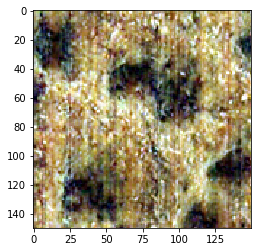

In [25]:
#imagen2 = image_utils.load_img(dataauto[0], 
                             #target_size = (16,16))
plt.imshow(testA_x[0], cmap='viridis')
plt.show()

In [26]:
#Se descomprime cada imagen de la lista creada.
for i in range(0, size):
    img11 = test_x[i] #Imagenes
    blue = img11[:,:,0]
    #blue =  np.float32(blue)   #convert to float
    #blue /= 255;            #Escalar
    green = img11[:,:,1]
    #green =  np.float32(green) #convert to float
    #green /= 255;           #Escalar
    red = img11[:,:,2]
    #red =  np.float32(red)     #convert to float
    #red /= 255;             #Escalar

    max_lev = 2       # how many levels of decomposition to draw
    
    for level in range(0, max_lev + 1):
        # compute the 2D DWT
        c = pywt.wavedec2(blue, 'haar', mode='periodization', level=level)
        d = pywt.wavedec2(green, 'haar', mode='periodization', level=level)
        e = pywt.wavedec2(red, 'haar', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        #c[0] /= np.abs(c[0]).max() #División entre
        #d[0] /= np.abs(d[0]).max() #División entre
        #e[0] /= np.abs(e[0]).max() #División entre
        #for detail_level in range(level):
            #c[detail_level + 1] = [t/np.abs(t).max() for t in c[detail_level + 1]]
            #d[detail_level + 1] = [t/np.abs(t).max() for t in d[detail_level + 1]]
            #e[detail_level + 1] = [t/np.abs(t).max() for t in e[detail_level + 1]]
    # Reconstruction
    #N=2, Img aproximación canales BGR.
    IMGba=((c[0]))
    IMGba = min_max_scaler.fit_transform(IMGba)
    #IMGba *= 255;
    #IMGba =  np.uint8(IMGba)
    IMGga=((d[0]))
    IMGga = min_max_scaler.fit_transform(IMGga)
    #IMGga *= 255;
    #IMGga =  np.uint8(IMGga)
    IMGra=((e[0]))
    IMGra = min_max_scaler.fit_transform(IMGra)
    #IMGra *= 255;
    #IMGra =  np.uint8(IMGra)    
    # Para combinar las diferentes matrices en una única matriz multicanal, es decir, una imagen en color.
    imga = cv2.merge((IMGba,IMGga,IMGra))
    #Save Data
    testA1_x[i] = imga

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


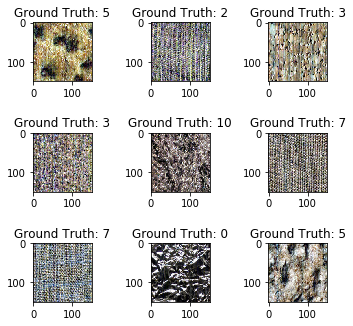

In [27]:
for i in range(9):
    plt.figure(0, figsize=[5,5])
    plt.subplot(3,3,i+1)
    plt.imshow(testA_x[i], cmap= 'Accent')
    plt.title("Ground Truth: {}".format(test_y[i]))
    plt.tight_layout()
    #plt.show()
    #plt.savefig('vgg16_img12.pdf')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


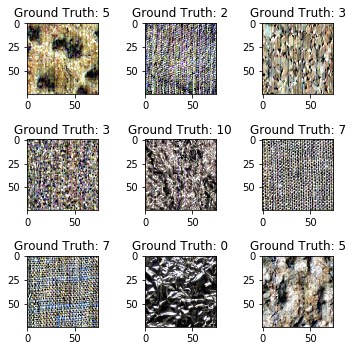

In [28]:
for i in range(9):
    plt.figure(0, figsize=[5,5])
    plt.subplot(3,3,i+1)
    plt.imshow(testA1_x[i], cmap= 'Accent')
    plt.title("Ground Truth: {}".format(test_y[i]))
    plt.tight_layout()
    #plt.show()
    #plt.savefig('vgg16_img13.pdf')

**Pre-procesamiento**

In [29]:
#Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(Labels_train)
test_label = to_categorical(test_y)

print('[INFO] Display the change for category label using one-hot encoding...')
print("For example: banded clase.")
print('Original label:', Labels_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

[INFO] Display the change for category label using one-hot encoding...
For example: banded clase.
Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**Creamos el set de Entrenamiento y Validacion a partir del 16% de entrenamiento**

In [30]:
print("[INFO] Dataset creation... ")
train_x,valid_x,train_label,valid_label = train_test_split(Dataset_train, train_Y_one_hot, test_size=0.18)
print('New Training dataset shape : ', train_x.shape, train_label.shape)
print('Validation dataset shape : ', valid_x.shape, valid_label.shape)

[INFO] Dataset creation... 
New Training dataset shape :  (3310, 300, 300, 3) (3310, 11)
Validation dataset shape :  (727, 300, 300, 3) (727, 11)


In [31]:
size1=len(train_x)
size2=len(valid_x)
print("Cantidad de imagenes:",size1)
print("Cantidad de imagenes:",size2)

Cantidad de imagenes: 3310
Cantidad de imagenes: 727


In [32]:
#Se descomprime cada imagen de la lista creada.
for i in range(0, size1):
    img2 = train_x[i] #Imagenes
    blue = img2[:,:,0]
    #blue =  np.float32(blue)   #convert to float
    #blue /= 255;            #Escalar
    green = img2[:,:,1]
    #green =  np.float32(green) #convert to float
    #green /= 255;           #Escalar
    red = img2[:,:,2]
    #red =  np.float32(red)     #convert to float
    #red /= 255;             #Escalar

    max_lev = 1       # how many levels of decomposition to draw
    
    for level in range(0, max_lev + 1):
        # compute the 2D DWT
        c = pywt.wavedec2(blue, 'haar', mode='periodization', level=level)
        d = pywt.wavedec2(green, 'haar', mode='periodization', level=level)
        e = pywt.wavedec2(red, 'haar', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        #c[0] /= np.abs(c[0]).max() #División entre
        #d[0] /= np.abs(d[0]).max() #División entre
        #e[0] /= np.abs(e[0]).max() #División entre
        #for detail_level in range(level):
            #c[detail_level + 1] = [t/np.abs(t).max() for t in c[detail_level + 1]]
            #d[detail_level + 1] = [t/np.abs(t).max() for t in d[detail_level + 1]]
            #e[detail_level + 1] = [t/np.abs(t).max() for t in e[detail_level + 1]]
    # Reconstruction
    #N=3, Img aproximación canales BGR.
    IMGba=((c[0]))
    IMGba = min_max_scaler.fit_transform(IMGba)
    #IMGba *= 255;
    #IMGba =  np.uint8(IMGba)
    IMGga=((d[0]))
    IMGga = min_max_scaler.fit_transform(IMGga)
    #IMGga *= 255;
    #IMGga =  np.uint8(IMGga)
    IMGra=((e[0]))
    IMGra = min_max_scaler.fit_transform(IMGra)
    #IMGra *= 255;
    #IMGra =  np.uint8(IMGra)    
    # Para combinar las diferentes matrices en una única matriz multicanal, es decir, una imagen en color.
    imga = cv2.merge((IMGba,IMGga,IMGra))

    #Save Data
    trainA_x[i] = imga

In [33]:
#Se descomprime cada imagen de la lista creada.
for i in range(0, size2):
    img3 = valid_x[i] #Imagenes
    blue = img3[:,:,0]
    #blue =  np.float32(blue)   #convert to float
    #blue /= 255;            #Escalar
    green = img3[:,:,1]
    #green =  np.float32(green) #convert to float
    #green /= 255;           #Escalar
    red = img3[:,:,2]
    #red =  np.float32(red)     #convert to float
    #red /= 255;             #Escalar

    max_lev = 1       # how many levels of decomposition to draw
    
    for level in range(0, max_lev + 1):
        # compute the 2D DWT
        c = pywt.wavedec2(blue, 'haar', mode='periodization', level=level)
        d = pywt.wavedec2(green, 'haar', mode='periodization', level=level)
        e = pywt.wavedec2(red, 'haar', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        #c[0] /= np.abs(c[0]).max() #División entre
        #d[0] /= np.abs(d[0]).max() #División entre
        #e[0] /= np.abs(e[0]).max() #División entre
        #for detail_level in range(level):
            #c[detail_level + 1] = [t/np.abs(t).max() for t in c[detail_level + 1]]
            #d[detail_level + 1] = [t/np.abs(t).max() for t in d[detail_level + 1]]
            #e[detail_level + 1] = [t/np.abs(t).max() for t in e[detail_level + 1]]
    # Reconstruction
    #N=3, Img aproximación canales BGR.
    IMGba=((c[0]))
    IMGba = min_max_scaler.fit_transform(IMGba)
    #IMGba *= 255;
    #IMGba =  np.uint8(IMGba)
    IMGga=((d[0]))
    IMGga = min_max_scaler.fit_transform(IMGga)
    #IMGga *= 255;
    #IMGga =  np.uint8(IMGga)
    IMGra=((e[0]))
    IMGra = min_max_scaler.fit_transform(IMGra)
    #IMGra *= 255;
    #IMGra =  np.uint8(IMGra)    
    # Para combinar las diferentes matrices en una única matriz multicanal, es decir, una imagen en color.
    imga = cv2.merge((IMGba,IMGga,IMGra))

    #Save Data
    validA_x[i] = imga

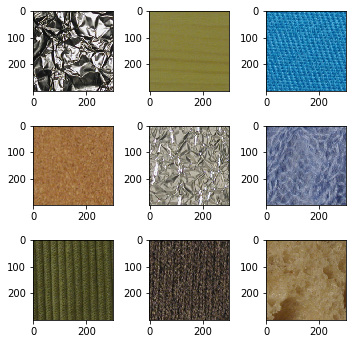

In [34]:
for i in range(9):
    plt.figure(0, figsize=[5,5])
    plt.subplot(3,3,i+1)
    plt.imshow(train_x[i], cmap= 'Accent')
    #plt.title("Ground Truth: {}".format(train_label[i]))
    plt.tight_layout()
    #plt.show()
    #plt.savefig('imgX.pdf')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


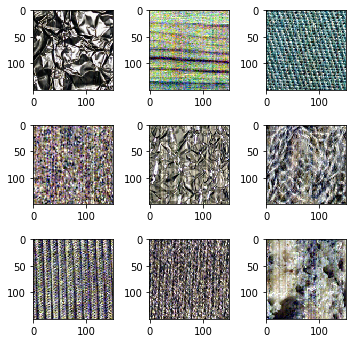

In [35]:
for i in range(9):
    plt.figure(0, figsize=[5,5])
    plt.subplot(3,3,i+1)
    plt.imshow(trainA_x[i], cmap= 'Accent')
    #plt.title("Ground Truth: {}".format(train_label[i]))
    plt.tight_layout()
    #plt.show()
    #plt.savefig('imgX.pdf')

In [36]:
#Se descomprime cada imagen de la lista creada.
for i in range(0, size1):
    img22 = train_x[i] #Imagenes
    blue = img22[:,:,0]
    #blue =  np.float32(blue)   #convert to float
    #blue /= 255;            #Escalar
    green = img22[:,:,1]
    #green =  np.float32(green) #convert to float
    #green /= 255;           #Escalar
    red = img22[:,:,2]
    #red =  np.float32(red)     #convert to float
    #red /= 255;             #Escalar

    max_lev = 2       # how many levels of decomposition to draw
    
    for level in range(0, max_lev + 1):
        # compute the 2D DWT
        c = pywt.wavedec2(blue, 'haar', mode='periodization', level=level)
        d = pywt.wavedec2(green, 'haar', mode='periodization', level=level)
        e = pywt.wavedec2(red, 'haar', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        #c[0] /= np.abs(c[0]).max() #División entre
        #d[0] /= np.abs(d[0]).max() #División entre
        #e[0] /= np.abs(e[0]).max() #División entre
        #for detail_level in range(level):
            #c[detail_level + 1] = [t/np.abs(t).max() for t in c[detail_level + 1]]
            #d[detail_level + 1] = [t/np.abs(t).max() for t in d[detail_level + 1]]
            #e[detail_level + 1] = [t/np.abs(t).max() for t in e[detail_level + 1]]
    # Reconstruction
    #N=3, Img aproximación canales BGR.
    IMGba=((c[0]))
    IMGba = min_max_scaler.fit_transform(IMGba)
    #IMGba *= 255;
    #IMGba =  np.uint8(IMGba)
    IMGga=((d[0]))
    IMGga = min_max_scaler.fit_transform(IMGga)
    #IMGga *= 255;
    #IMGga =  np.uint8(IMGga)
    IMGra=((e[0]))
    IMGra = min_max_scaler.fit_transform(IMGra)
    #IMGra *= 255;
    #IMGra =  np.uint8(IMGra)    
    # Para combinar las diferentes matrices en una única matriz multicanal, es decir, una imagen en color.
    imga = cv2.merge((IMGba,IMGga,IMGra))

    #Save Data
    trainA1_x[i] = imga

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


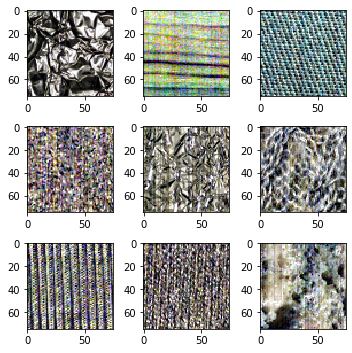

In [37]:
for i in range(9):
    plt.figure(0, figsize=[5,5])
    plt.subplot(3,3,i+1)
    plt.imshow(trainA1_x[i], cmap= 'Accent')
    #plt.title("Ground Truth: {}".format(train_label[i]))
    plt.tight_layout()
    #plt.show()
    #plt.savefig('imgX.pdf')

In [38]:
#Se descomprime cada imagen de la lista creada.
for i in range(0, size2):
    img33 = valid_x[i] #Imagenes
    blue = img33[:,:,0]
    #blue =  np.float32(blue)   #convert to float
    #blue /= 255;            #Escalar
    green = img33[:,:,1]
    #green =  np.float32(green) #convert to float
    #green /= 255;           #Escalar
    red = img33[:,:,2]
    #red =  np.float32(red)     #convert to float
    #red /= 255;             #Escalar

    max_lev = 2       # how many levels of decomposition to draw
    
    for level in range(0, max_lev + 1):
        # compute the 2D DWT
        c = pywt.wavedec2(blue, 'haar', mode='periodization', level=level)
        d = pywt.wavedec2(green, 'haar', mode='periodization', level=level)
        e = pywt.wavedec2(red, 'haar', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        #c[0] /= np.abs(c[0]).max() #División entre
        #d[0] /= np.abs(d[0]).max() #División entre
        #e[0] /= np.abs(e[0]).max() #División entre
        #for detail_level in range(level):
            #c[detail_level + 1] = [t/np.abs(t).max() for t in c[detail_level + 1]]
            #d[detail_level + 1] = [t/np.abs(t).max() for t in d[detail_level + 1]]
            #e[detail_level + 1] = [t/np.abs(t).max() for t in e[detail_level + 1]]
    # Reconstruction
    #N=3, Img aproximación canales BGR.
    IMGba=((c[0]))
    IMGba = min_max_scaler.fit_transform(IMGba)
    #IMGba *= 255;
    #IMGba =  np.uint8(IMGba)
    IMGga=((d[0]))
    IMGga = min_max_scaler.fit_transform(IMGga)
    #IMGga *= 255;
    #IMGga =  np.uint8(IMGga)
    IMGra=((e[0]))
    IMGra = min_max_scaler.fit_transform(IMGra)
    #IMGra *= 255;
    #IMGra =  np.uint8(IMGra)    
    # Para combinar las diferentes matrices en una única matriz multicanal, es decir, una imagen en color.
    imga = cv2.merge((IMGba,IMGga,IMGra))

    #Save Data
    validA1_x[i] = imga
    validA1_x[i] = imga

In [39]:
validA1_x[0]

array([[[0.26633912, 0.22554892, 0.2100793 ],
        [0.5900521 , 0.54845464, 0.5433427 ],
        [0.6924138 , 0.6532664 , 0.5830537 ],
        ...,
        [0.22928715, 0.25981116, 0.1355115 ],
        [0.1397059 , 0.18226606, 0.16318463],
        [0.00128287, 0.04685581, 0.03476819]],

       [[0.32972968, 0.29740512, 0.22989811],
        [0.59057593, 0.54740703, 0.54560906],
        [0.7668967 , 0.7010049 , 0.6870805 ],
        ...,
        [0.20761079, 0.25583696, 0.07766472],
        [0.11960781, 0.19113308, 0.        ],
        [0.2046184 , 0.28545004, 0.08940396]],

       [[0.29877144, 0.2819361 , 0.17270674],
        [0.5680629 , 0.54059696, 0.49461752],
        [0.8013793 , 0.72236174, 0.6837249 ],
        ...,
        [0.13824666, 0.16095376, 0.10016067],
        [0.22794116, 0.2866996 , 0.20779218],
        [0.53688264, 0.59494466, 0.54718536]],

       ...,

       [[0.4574939 , 0.50948113, 0.13929789],
        [0.48952878, 0.5301205 , 0.16033989],
        [0.5455173 , 0

**Pre-procesamiento** NOTA:Se omite en caso de crear nuestro propio dataset.

In [40]:
# Con astype establecemos la precisión de los números a flotantes de 32 bits
#train_X = train_X.astype('float32')
#x_test = x_test.astype('float32')
#valid_X = valid_X.astype('float32')

# EJERCICIO
# Escala los valores de los pixeles para que esten en el rango de 0 a 1
#train_X /= 255.0
#x_test /= 255.0
#valid_X /= 255.0

**Revisar si los dataset, estan pre-procesados a datos float32**

In [41]:
# Con astype establecemos la precisión de los números a flotantes de 32 bits
#trainA_x = trainA_x.astype('float32')
#testA_x = testA_x.astype('float32')
#validA_x = validA_x.astype('float32')

#trainA1_x = trainA1_x.astype('float32')
#testA1_x = testA1_x.astype('float32')
#validA1_x = validA1_x.astype('float32')

# EJERCICIO
# Escala los valores de los pixeles para que esten en el rango de 0 a 1
#trainA_x /= 255.0
#testA_x /= 255.0
#validA_x /= 255.0

#trainA1_x /= 255.0
#testA1_x /= 255.0
#validA1_x /= 255.0

In [42]:
#validA1_x[0]

# **Creamos el modelo de CNN**

In [43]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-4 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 100 #100 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 30 #32, 64, 128 # cantidad de imágenes que se toman a la vez en memoria
img_width, img_height = 300, 300
img_width1, img_height1 = 150, 150
img_width2, img_height2 = 75, 75
data_augmentation = False
weight_decay = 0.0005
# Find the unique numbers from the train labels
#nClasses = 10

In [44]:
# Escribe la línea de código que elimina información previa de los modelos 
backend.clear_session()

#Checking format of Image:
if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3)
 
 #Checking format of Image:
if K.image_data_format() == 'channels_first': 
	input_shape1 = (3, img_width1, img_height1) 
else: 
	input_shape1 = (img_width1, img_height1, 3)
 
  #Checking format of Image:
if K.image_data_format() == 'channels_first': 
	input_shape2 = (3, img_width2, img_height2) 
else: 
	input_shape2 = (img_width2, img_height2, 3)

### **Arquitectura - Transferencia de conocimiento**

### **CNN - VGG16**

In [45]:
# Librerías para transferencia de conocimiento
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [46]:
# Creación del modelo con transferencia de conocimiento
modelo_base = VGG16(weights = 'imagenet', include_top = False, 
                       input_shape = input_shape) 
# Include_top se refiere a las capas dense
# Con False no las colocamos, con true colocarlas

In [47]:
# El siguiente proceso será para indicar a cada capa convolucional del modelo base
# que no será entrenada.
for layer in modelo_base.layers:
  layer.trainable = False   # así indicamos que estas capas no se vuelvan a entrenar

In [48]:
# Definición las últimas capas del modelo
modelo_intermedio = modelo_base.get_layer('block5_pool').output
modelo_intermedio = GlobalAveragePooling2D()(modelo_intermedio)
#modelo_intermedio = modelo_base.output
#modelo_intermedio = Flatten()(modelo_intermedio) # que capa y a que modelo
#modelo_intermedio = Dense(1024, activation = 'relu')(modelo_intermedio)
#modelo_intermedio = BatchNormalization()(modelo_intermedio)
#modelo_intermedio = Dense(512, activation = 'relu')(modelo_intermedio)
#modelo_intermedio = BatchNormalization()(modelo_intermedio)
#modelo_intermedio = Dropout(0.2)(modelo_intermedio)
#modelo_intermedio = Dense(256, activation = 'relu')(modelo_intermedio)
#modelo_intermedio = Dense(128, activation = 'relu')(modelo_intermedio)
#modelo_intermedio = BatchNormalization()(modelo_intermedio)
#modelo_intermedio = Dropout(0.4)(modelo_intermedio)
#modelo_intermedio = Dense(64, activation = 'relu')(modelo_intermedio)
#modelo_intermedio = BatchNormalization()(modelo_intermedio)
#modelo_intermedio = Dropout(0.5)(modelo_intermedio)
modelo_intermedio = Dense(nClasses, activation = 'softmax')(modelo_intermedio)

model = Model(inputs = modelo_base.input, outputs = modelo_intermedio)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0   

In [49]:
#print(model.summary())
plot_model(model, to_file='vgg16_ktb1.pdf', show_shapes=True)

**ENTRENAMIENTO DEL MODELO**

In [50]:
# Definimos el optimizador Adam, que es una variante de Gradiente Descendente
Adam = optimizers.Adam(lr = INIT_LR, beta_1 = 0.9, beta_2 = 0.999, 
                       epsilon = 1e-08, decay =0.0) # Los parámetros que proponemos para beta_1, beta_2, epsilon y decay
                                                    # han probado dar buenos resultados en la práctica
sgd = optimizers.SGD(learning_rate=INIT_LR, decay=1e-06, momentum=0.9, nesterov=True)
#opt_rms = optimizers.rmsprop(lr=INIT_LR,decay=1e-6)

def lr_schedule(epoch):
    lrate = 0.0001
    if epoch > 25:
        lrate = 1e-04
    elif epoch > 40:
        lrate = 1e-06        
    return lrate

# Compilamos el modelo
model.compile (loss = 'categorical_crossentropy', optimizer=Adam, metrics = ['acc'])#accuracy para versiones recientes

# Define un checkpointer para guardar los pesos sinapticos de la red
checkpointer = ModelCheckpoint('modelktb1_v1.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
#Define EarlyStopping para monitorear variable, su efecto se activa al cumplir 20 epocas sin incremento.
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
#Define CSVLogger para guardar las metricas en cada epoca
csv_logger = CSVLogger('modelvgg16_history.csv', append=True)
#Define ReduceLROnPlateau Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4)
###########################################################
if not data_augmentation:
	print('Not using data augmentation.')
 # Entrenamos el modelo: Aprende a clasificar imágenes.
	tic = time()
	M = model.fit(train_x, train_label, epochs=epochs,validation_data=(valid_x, valid_label),
               verbose=2, shuffle=True,
               batch_size=batch_size, callbacks=[checkpointer,early,LearningRateScheduler(lr_schedule), csv_logger, reduce_lr])
	print('Total training time:', time()-tic, 'seconds')
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(featurewise_center=False,samplewise_center=False,
                                 featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                 samplewise_std_normalization=False,  # divide each input by its std
                                 zca_whitening=False,  # apply ZCA whitening
                                 zca_epsilon=1e-06,  # epsilon for ZCA whitening
                                 rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
                                 # randomly shift images horizontally (fraction of total width)
                                 width_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                                 height_shift_range=0.1,
                                 shear_range=0.,  # set range for random shear
                                 zoom_range=0.,  # set range for random zoom
                                 channel_shift_range=0.,  # set range for random channel shifts
                                 # set mode for filling points outside the input boundaries
                                 fill_mode='nearest',
                                 cval=0.,  # value used for fill_mode = "constant"
                                 horizontal_flip=True,  # randomly flip images
                                 vertical_flip=False,  # randomly flip images
                                 # set rescaling factor (applied before any other transformation)
                                 rescale=None,
                                 # set function that will be applied on each input
                                 preprocessing_function=None,
                                 # image data format, either "channels_first" or "channels_last"
                                 data_format=None)
                                 # fraction of images reserved for validation (strictly between 0 and 1)
                                 #validation_split=0.0)
                                 # Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(train_x)
	#sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,shuffle=True,verbose=1,validation_data=(valid_X, valid_label))
	# Fit the model on the batches generated by datagen.flow().
     #validation_data=(valid_X, valid_label)
    # Entrenamos el modelo: Aprende a clasificar imágenes.
    tic = time()
    M = model.fit_generator(datagen.flow(train_x,train_label,batch_size=batch_size), validation_data=(valid_x, valid_label),
                            steps_per_epoch=len(train_x)//batch_size, epochs=epochs, 
                            verbose=2, shuffle=True, callbacks=[checkpointer,early,LearningRateScheduler(lr_schedule)])
    print('Total training time:', time()-tic, 'seconds')

Not using data augmentation.

Train on 3310 samples, validate on 727 samples
Epoch 1/100
 - 23s - loss: 2.5466 - acc: 0.1079 - val_loss: 2.4270 - val_acc: 0.1073

Epoch 00001: val_loss improved from inf to 2.42701, saving model to modelktb1_v1.h5
Epoch 2/100
 - 20s - loss: 2.3498 - acc: 0.1622 - val_loss: 2.2717 - val_acc: 0.2118

Epoch 00002: val_loss improved from 2.42701 to 2.27174, saving model to modelktb1_v1.h5
Epoch 3/100
 - 20s - loss: 2.2178 - acc: 0.2834 - val_loss: 2.1540 - val_acc: 0.3714

Epoch 00003: val_loss improved from 2.27174 to 2.15398, saving model to modelktb1_v1.h5
Epoch 4/100
 - 20s - loss: 2.1116 - acc: 0.4069 - val_loss: 2.0531 - val_acc: 0.4911

Epoch 00004: val_loss improved from 2.15398 to 2.05305, saving model to modelktb1_v1.h5
Epoch 5/100
 - 20s - loss: 2.0178 - acc: 0.5341 - val_loss: 1.9624 - val_acc: 0.5942

Epoch 00005: val_loss improved from 2.05305 to 1.96239, saving model to modelktb1_v1.h5
Epoch 6/100
 - 20s - loss: 1.9331 - acc: 0.6218 - val_los


Epoch 00046: val_loss improved from 0.77585 to 0.76526, saving model to modelktb1_v1.h5
Epoch 47/100
 - 20s - loss: 0.7757 - acc: 0.8366 - val_loss: 0.7556 - val_acc: 0.8418

Epoch 00047: val_loss improved from 0.76526 to 0.75557, saving model to modelktb1_v1.h5
Epoch 48/100
 - 20s - loss: 0.7660 - acc: 0.8411 - val_loss: 0.7463 - val_acc: 0.8404

Epoch 00048: val_loss improved from 0.75557 to 0.74633, saving model to modelktb1_v1.h5
Epoch 49/100
 - 20s - loss: 0.7562 - acc: 0.8432 - val_loss: 0.7375 - val_acc: 0.8446

Epoch 00049: val_loss improved from 0.74633 to 0.73754, saving model to modelktb1_v1.h5
Epoch 50/100
 - 20s - loss: 0.7470 - acc: 0.8429 - val_loss: 0.7288 - val_acc: 0.8446

Epoch 00050: val_loss improved from 0.73754 to 0.72882, saving model to modelktb1_v1.h5
Epoch 51/100
 - 20s - loss: 0.7380 - acc: 0.8453 - val_loss: 0.7205 - val_acc: 0.8459

Epoch 00051: val_loss improved from 0.72882 to 0.72047, saving model to modelktb1_v1.h5
Epoch 52/100
 - 20s - loss: 0.7293 -


Epoch 00098: val_loss improved from 0.48802 to 0.48525, saving model to modelktb1_v1.h5
Epoch 99/100
 - 20s - loss: 0.4871 - acc: 0.8927 - val_loss: 0.4827 - val_acc: 0.8872

Epoch 00099: val_loss improved from 0.48525 to 0.48272, saving model to modelktb1_v1.h5
Epoch 100/100
 - 20s - loss: 0.4840 - acc: 0.8937 - val_loss: 0.4792 - val_acc: 0.8872

Epoch 00100: val_loss improved from 0.48272 to 0.47920, saving model to modelktb1_v1.h5
Total training time: 2011.7780244350433 seconds


#**Rendimiento del Modelo (Historial)**

Training and validation curves. Let's see the training and validation process by the visualization of history of fitting. This allow us to quickly know if how our model fit our data (overfitting, underfitting, model convergence, etc...)

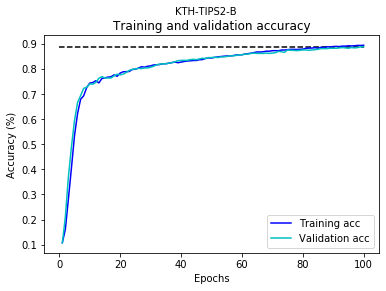

In [65]:
accuracy = M.history['acc']
val_accuracy = M.history['val_acc']
loss = M.history['loss']
val_loss = M.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#epochs = range(len(accuracy))

plt.figure(1)
plt.plot(epochs, accuracy, '-b', label='Training acc')
plt.plot(epochs, val_accuracy, '-c', label='Validation acc')
plt.title('Training and validation accuracy')
plt.suptitle("KTH-TIPS2-B", fontsize=10)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(loc='best')
plt.hlines(y=0.8872, xmin=0, xmax=100, colors='k', linestyles='dashed')
plt.savefig('vgg16_img2.pdf')

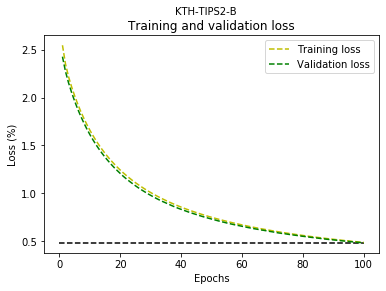

In [66]:
plt.figure(2)
plt.plot(epochs, loss, '--y', label='Training loss')
plt.plot(epochs, val_loss, '--g', label='Validation loss')
plt.title('Training and validation loss')
plt.suptitle("KTH-TIPS2-B", fontsize=10)
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.legend(loc='best')
plt.hlines(y=0.4792, xmin=0, xmax=100, colors='k', linestyles='dashed')
#plt.show()
plt.savefig('vgg16_img3.pdf')

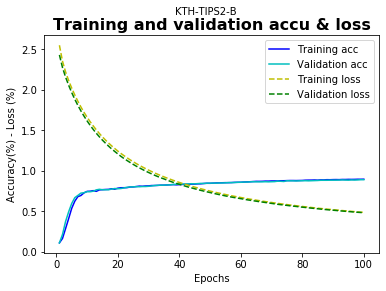

In [53]:
plt.figure(3)
plt.plot(epochs, accuracy, '-b', label='Training acc')
plt.plot(epochs, val_accuracy, '-c', label='Validation acc')
plt.plot(epochs, loss, '--y', label='Training loss')
plt.plot(epochs, val_loss, '--g', label='Validation loss')
plt.title('Training and validation accu & loss',fontsize=16, fontweight='bold')
plt.suptitle("KTH-TIPS2-B", fontsize=10)
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%) - Loss (%)')
plt.legend(loc='best')
#plt.show()
plt.savefig('vgg16_img4.pdf')

# **`Evaluamos el modelo`**

**Score trained model and prediction**

In [54]:
# Evalua tu modelo mediante la función evaluate y muestra el error y accuracy en la ultima época
model = tf.keras.models.load_model("modelktb1_v1.h5")
test_eval = model.evaluate(test_x, test_label, verbose=2)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

715/715 - 6s - loss: 0.4873 - acc: 0.8867
Test loss: 0.48733663198414384
Test accuracy: 0.88671327


**Confusion matrix**
Confusion matrix can be very helpfull to see your model drawbacks. We plot the confusion matrix of the validation results. For good vizualization of our confusion matrix, we have to define to fonction.

In [55]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels,rotation=45) #ha="right",rotation_mode="anchor", verticalalignment="bottom"
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

In [56]:
pred = model.predict(test_x)

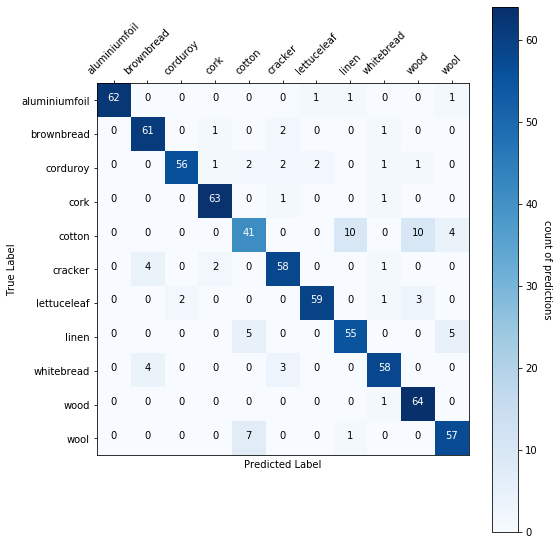

In [57]:
labels=["aluminiumfoil", "brownbread", "corduroy", "cork", "cotton", "cracker", "lettuceleaf", "linen", "whitebread", "wood","wool"]
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_label, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = test_x[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(8,8))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
#plt.show()
plt.savefig('vgg16_img7.pdf')

**Aprendamos de los errores:**

In [58]:
clases=["aluminiumfoil", "brownbread", "corduroy", "cork", "cotton", "cracker", "lettuceleaf", "linen", "whitebread", "wood","wool"]

In [59]:
#predicted_classes2 = model.predict([x_test, x_testA])
predicted_classes=[]
for predicted_imgs in pred: #predicted_classes2:
    predicted_classes.append(predicted_imgs.tolist().index(max(predicted_imgs)))
predicted_classes=np.array(predicted_classes)
predicted_classes.shape, test_y.shape

((715,), (715,))

In [60]:
test_y = test_y.reshape(715,)
test_y.shape

(715,)

In [61]:
correct = np.where(predicted_classes==test_y)[0]
print("Found %d correct labels" % len(correct))

incorrect = np.where(predicted_classes!=test_y)[0]
print("Found %d incorrect labels" % len(incorrect))

Found 634 correct labels
Found 81 incorrect labels


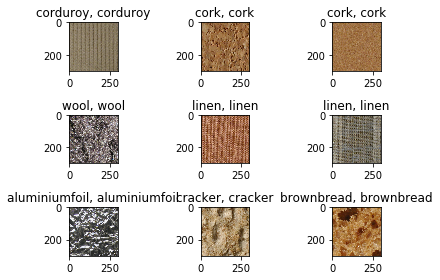

In [62]:
for i, correct in enumerate(correct[0:9]):
    plt.figure(4)    
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[correct].reshape(300, 300, 3), cmap= 'Accent', interpolation='none')
    plt.title("{}, {}".format(clases[predicted_classes[correct]], clases[test_y[correct]]))
    plt.tight_layout()
    #plt.show()
    plt.savefig('vgg16_img5.pdf')

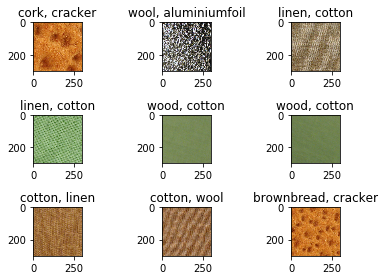

In [63]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.figure(5)
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[incorrect].reshape(300, 300, 3), cmap= 'Accent', interpolation='none')
    plt.title("{}, {}".format(clases[predicted_classes[incorrect]], clases[test_y[incorrect]]))
    plt.tight_layout()
    #plt.show()
    plt.savefig('vgg16_img6.pdf')

In [64]:
#target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_y, predicted_classes, target_names=clases))

               precision    recall  f1-score   support

aluminiumfoil       1.00      0.95      0.98        65
   brownbread       0.88      0.94      0.91        65
     corduroy       0.97      0.86      0.91        65
         cork       0.94      0.97      0.95        65
       cotton       0.75      0.63      0.68        65
      cracker       0.88      0.89      0.89        65
  lettuceleaf       0.95      0.91      0.93        65
        linen       0.82      0.85      0.83        65
   whitebread       0.91      0.89      0.90        65
         wood       0.82      0.98      0.90        65
         wool       0.85      0.88      0.86        65

     accuracy                           0.89       715
    macro avg       0.89      0.89      0.89       715
 weighted avg       0.89      0.89      0.89       715

